In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/yt/file\Annotation-20250409T060352Z-001/Annotation/Annotation_For3Class.csv")

In [5]:
df.head()

,ImagePath,X0,X1,Y0,Y1,Class
0,000015335564.jpg,80,116,477,514,ADVISORY SPEED MPH
1,000015340509.jpg,1720,1760,485,526,ADVISORY SPEED MPH
2,000016400582.jpg,50,76,468,490,ADVISORY SPEED MPH
3,000016450565.jpg,1765,1840,517,590,ADVISORY SPEED MPH
4,000024250089.jpg,354,428,430,504,ADVISORY SPEED MPH


In [6]:
df.nunique()

ImagePath    5610
X0           1619
X1           1658
Y0            485
Y1            478
Class           3
dtype: int64

In [20]:
df[df['ImagePath'].value_counts()>1]

C:\Users\aiuni\AppData\Local\Temp\ipykernel_17796\1627944175.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['ImagePath'].value_counts()>1]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [7]:
df['Class'].value_counts()

Class
ADVISORY SPEED MPH             1994
DO NOT ENTER                   1966
DIRECTIONAL ARROW AUXILIARY    1650
Name: count, dtype: int64

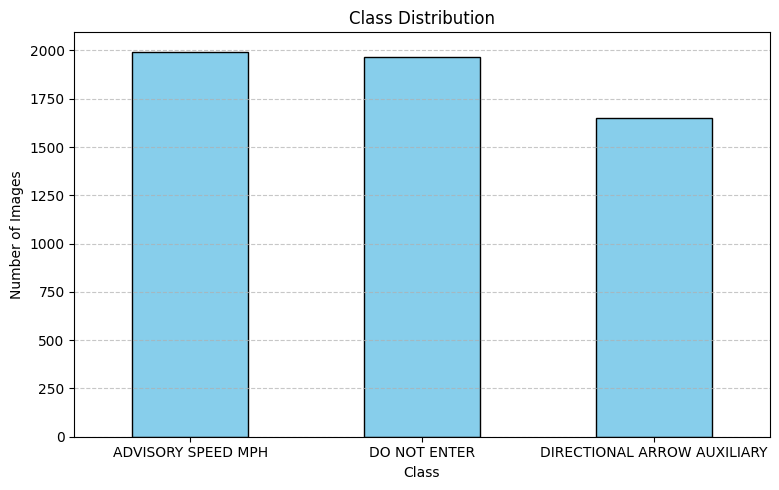

In [12]:
class_counts = df['Class'].value_counts()

plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


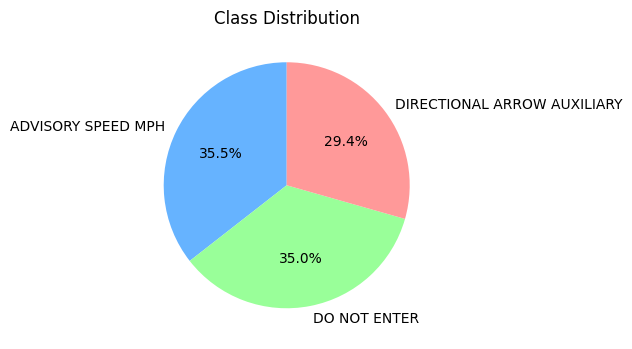

In [13]:
plt.figure(figsize=(6, 6))
class_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ff9999'])
plt.title('Class Distribution')
plt.ylabel('')  # Removes the default "Class" label
plt.tight_layout()
plt.show()


In [14]:
df['box_width'] = df['X1'] - df['X0']
df['box_height'] = df['Y1'] - df['Y0']

# Summary statistics of bounding box sizes
df[['box_width', 'box_height']].describe()


,box_width,box_height
count,5610.000000,5610.000000
mean,75.045811,74.542781
std,30.341390,33.985483
min,9.000000,7.000000
25%,55.000000,48.000000
50%,72.000000,71.000000
75%,94.000000,96.000000
max,275.000000,290.000000


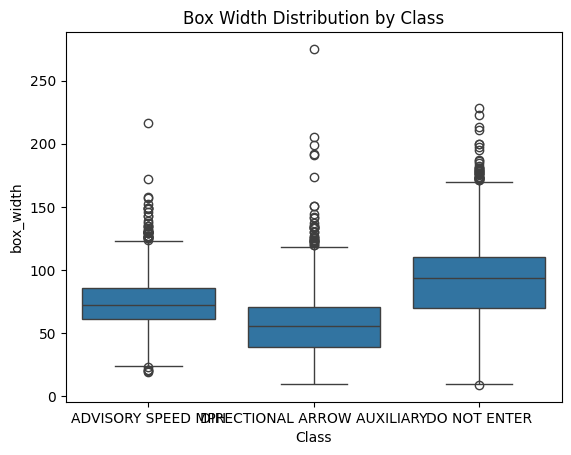

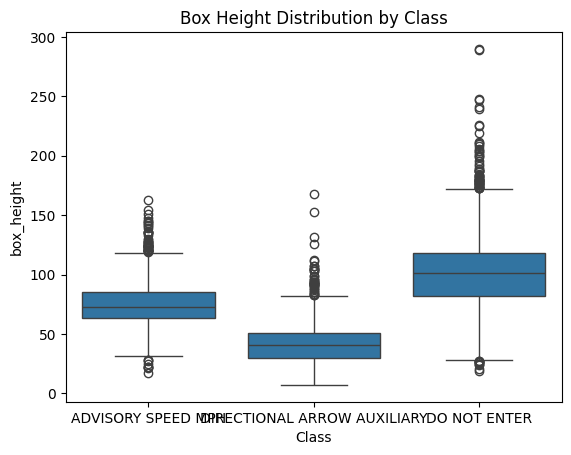

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box width/height distribution by class
sns.boxplot(x='Class', y='box_width', data=df)
plt.title("Box Width Distribution by Class")
plt.show()

sns.boxplot(x='Class', y='box_height', data=df)
plt.title("Box Height Distribution by Class")
plt.show()


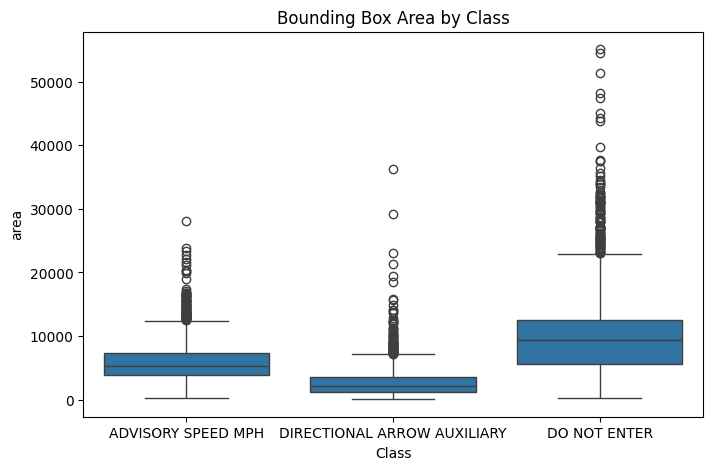

In [17]:
plt.figure(figsize=(8, 5))
df['area'] = df['box_width'] * df['box_height']
sns.boxplot(x='Class', y='area', data=df)
plt.title("Bounding Box Area by Class")
plt.show()
